In [1]:
import joblib
import math
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd

In [2]:
%%time
jpd = joblib.load('jets_x1x2.data')

CPU times: user 97 ms, sys: 26.6 ms, total: 124 ms
Wall time: 129 ms


,pt,eta,x1,x2,id1,id2,pthat
count,102228.000000,102228.000000,102228.000000,102228.000000,102228.000000,102228.000000,102228.000000
mean,20.898622,-0.002809,0.035180,0.035461,16.635628,16.619302,27.715749
std,9.435342,0.892537,0.058972,0.059548,8.452611,8.462746,10.195947
min,10.000478,-1.579957,0.000658,0.000712,-5.000000,-5.000000,19.771379
25%,15.473357,-0.760701,0.006648,0.006708,21.000000,21.000000,21.810295
50%,18.897347,-0.005513,0.015285,0.015410,21.000000,21.000000,24.500332
75%,23.486098,0.760151,0.034962,0.034938,21.000000,21.000000,29.769347
max,241.439596,1.579990,0.778321,0.806539,21.000000,21.000000,242.824398


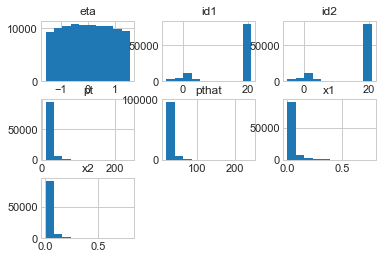

In [3]:
jpd.hist()
jpd.describe()

CPU times: user 219 ms, sys: 18.1 ms, total: 237 ms
Wall time: 242 ms


<Figure size 432x288 with 0 Axes>

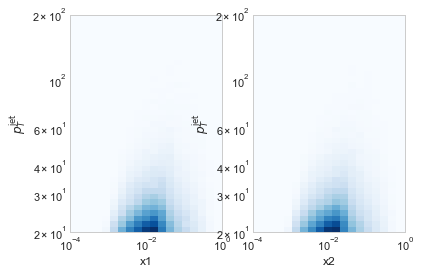

In [4]:
%%time
fig = plt.figure()
f, (ax1, ax2) = plt.subplots(1, 2)

ax1.set_xlabel('x1')
ax1.set_ylabel(r'$p_{T}^{\rm{jet}}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_yscale('log')
h1 = ax1.hist2d(jpd['x1'], jpd['pthat'], bins=(np.logspace(np.log10(1e-4),np.log10(1.0), 20), np.logspace(np.log10(20),np.log10(200), 40)), cmap='Blues')

ax2.set_xlabel('x2')
ax2.set_ylabel(r'$p_{T}^{\rm{jet}}$')
ax2.set_xscale('log')
ax2.set_yscale('log')
h2 = ax2.hist2d(jpd['x2'], jpd['pthat'], bins=(np.logspace(np.log10(1e-4),np.log10(1.0), 20), np.logspace(np.log10(20),np.log10(200), 40)), cmap='Blues')


<Figure size 432x288 with 0 Axes>

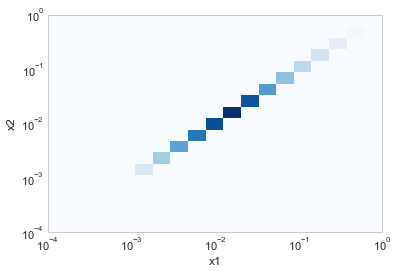

In [5]:
fig2 = plt.figure()
f, (ax11) = plt.subplots(1, 1)
ax11.set_xlabel('x1')
ax11.set_ylabel('x2')
ax11.set_xscale('log')
ax11.set_yscale('log')
hx1x2 = ax11.hist2d(jpd['x2'], jpd['x2'], bins=(np.logspace(np.log10(1e-4),np.log10(1.0), 20), np.logspace(np.log10(1e-4),np.log10(1.0), 20)), cmap='Blues')


In [6]:
high_x_jpd = jpd.loc[(jpd['x1'] > 0.01) & (jpd['x2'] > 0.01)]

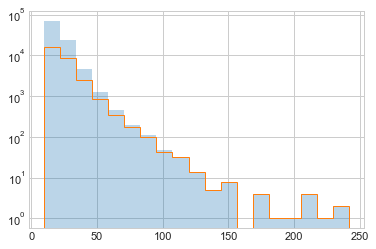

In [7]:
plt.yscale('log')
b, x, ax = plt.hist(jpd['pt'], bins=19, alpha=0.3)
b, x, ax = plt.hist(high_x_jpd['pt'], bins=19, alpha=1.0, histtype='step')

In [8]:
ff = jpd
gg = jpd.loc[(jpd['id1'] == 21) & (jpd['id2'] == 21)]
qg = jpd.loc[(jpd['id1'] != 21) & (jpd['id2'] == 21)]
gq = jpd.loc[(jpd['id1'] == 21) & (jpd['id2'] != 21)]
qq = jpd.loc[(jpd['id1'] != 21) & (jpd['id2'] != 21)]

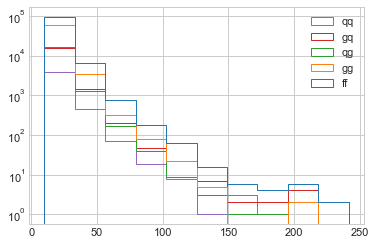

In [11]:
b, x, ax = plt.hist([ff['pt'], gg['pt'], qg['pt'], gq['pt'], qq['pt']], bins=10, alpha=1.0, histtype='step', label = ['ff', 'gg', 'qg', 'gq', 'qq'])
plt.yscale('log')
plt.legend()

In [18]:
print(x)
print(b)
print(ax)
print(b[0])
print(b[1])


[ 10.00047774  33.14438957  56.28830139  79.43221322 102.57612505
 125.72003688 148.86394871 172.00786054 195.15177237 218.29568419
 241.43959602]
[array([9.4601e+04, 6.5980e+03, 7.5200e+02, 1.8200e+02, 6.1000e+01,
       1.6000e+01, 6.0000e+00, 4.0000e+00, 6.0000e+00, 2.0000e+00]), array([5.9036e+04, 3.4480e+03, 3.1700e+02, 7.8000e+01, 2.2000e+01,
       5.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00]), array([1.5931e+04, 1.2800e+03, 1.6700e+02, 3.9000e+01, 9.0000e+00,
       3.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00]), array([1.5809e+04, 1.4240e+03, 1.9900e+02, 4.6000e+01, 2.2000e+01,
       7.0000e+00, 2.0000e+00, 2.0000e+00, 4.0000e+00, 2.0000e+00]), array([3.825e+03, 4.460e+02, 6.900e+01, 1.900e+01, 8.000e+00, 1.000e+00,
       3.000e+00, 1.000e+00, 0.000e+00, 0.000e+00])]
<a list of 5 Lists of Patches objects>
[9.4601e+04 6.5980e+03 7.5200e+02 1.8200e+02 6.1000e+01 1.6000e+01
 6.0000e+00 4.0000e+00 6.0000e+00 2.0000e+00]
[5.9036e+04 3.4480e+03 3.1700e